In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10

 99% 706M/715M [00:05<00:00, 219MB/s]
100% 715M/715M [00:05<00:00, 140MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
from zipfile import ZipFile
dataset = "cifar-10.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [7]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 30.8 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile('train.7z', mode='r')
archive.extractall()
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the libraries

In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir('train')

In [12]:
type(filenames)

list

In [13]:
len(filenames)

50000

In [14]:
print(filenames[0:5])
print(filenames[-5:])

['29941.png', '6611.png', '17312.png', '13727.png', '26292.png']
['10640.png', '7508.png', '26976.png', '45817.png', '19611.png']


Labels Processing

In [15]:
labels_df = pd.read_csv('trainLabels.csv')

In [16]:
labels_df.shape

(50000, 2)

In [17]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [18]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [19]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [20]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [21]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [22]:
labels_dictionary = {'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [23]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


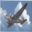

In [24]:
#displaying sample image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('train/'+filenames[0])
cv2_imshow(img)

In [25]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [26]:
id_list = list(labels_df['id'])

In [27]:
print(id_list[0:5])

[1, 2, 3, 4, 5]


In [28]:
print(id_list[-5:])

[49996, 49997, 49998, 49999, 50000]


Image Processing

In [29]:
#convert images to numpy arrays
train_data_folder = '/content/train/'

data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [30]:
type(data)

list

In [31]:
len(data)

50000

In [32]:
data[0].shape

(32, 32, 3)

In [34]:
#converting images and labels to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [35]:
type(X)

numpy.ndarray

In [36]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


Train Test Split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [39]:
#scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [40]:
X_test_scaled

array([[[[0.99215686, 0.87843137, 0.71764706],
         [0.99215686, 0.88235294, 0.7254902 ],
         [0.99607843, 0.89411765, 0.73333333],
         ...,
         [1.        , 0.88627451, 0.72941176],
         [0.99607843, 0.88235294, 0.7254902 ],
         [0.99215686, 0.87843137, 0.72156863]],

        [[0.97647059, 0.8745098 , 0.71764706],
         [0.98039216, 0.87843137, 0.7254902 ],
         [0.98431373, 0.89019608, 0.74117647],
         ...,
         [0.98823529, 0.8745098 , 0.71764706],
         [0.98431373, 0.87058824, 0.71372549],
         [0.98039216, 0.86666667, 0.71372549]],

        [[0.98039216, 0.88235294, 0.72941176],
         [0.98823529, 0.89411765, 0.74509804],
         [0.99607843, 0.90588235, 0.76078431],
         ...,
         [0.99215686, 0.8745098 , 0.71372549],
         [0.98823529, 0.8745098 , 0.71764706],
         [0.98431373, 0.87058824, 0.71372549]],

        ...,

        [[0.98431373, 0.87058824, 0.71372549],
         [0.98823529, 0.8745098 , 0.71764706]

In [41]:
X_train

array([[[[209, 210, 203],
         [213, 214, 209],
         [218, 219, 215],
         ...,
         [127,  74,  39],
         [122,  68,  35],
         [116,  63,  32]],

        [[210, 210, 202],
         [213, 214, 207],
         [218, 220, 214],
         ...,
         [124,  70,  35],
         [121,  67,  33],
         [123,  69,  36]],

        [[206, 205, 195],
         [209, 209, 202],
         [213, 215, 209],
         ...,
         [124,  70,  37],
         [131,  77,  42],
         [131,  78,  41]],

        ...,

        [[127, 108,  97],
         [138, 122, 110],
         [141, 127, 118],
         ...,
         [158, 149, 134],
         [161, 156, 151],
         [136, 137, 148]],

        [[145, 130, 119],
         [148, 135, 128],
         [136, 127, 128],
         ...,
         [175, 174, 172],
         [160, 161, 170],
         [143, 148, 164]],

        [[138, 128, 123],
         [140, 132, 136],
         [136, 131, 140],
         ...,
         [150, 154, 169],
        

Building the Neural Network

In [42]:
import tensorflow as tf
from tensorflow import keras

In [43]:
num_of_classes = 10

#setting up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [47]:
#training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.2570 - loss: 2.0479 - val_acc: 0.3413 - val_loss: 1.8320
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3596 - loss: 1.8092 - val_acc: 0.3850 - val_loss: 1.7228
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3795 - loss: 1.7445 - val_acc: 0.3740 - val_loss: 1.7175
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.3900 - loss: 1.7075 - val_acc: 0.3835 - val_loss: 1.6998
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.3961 - loss: 1.6858 - val_acc: 0.4008 - val_loss: 1.6627
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.4101 - loss: 1.6530 - val_acc: 0.4087 - val_loss: 1.6288
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.4151 - loss: 1.6382 - val_acc: 0.4022 - val_loss: 1.6502
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.4195 - loss: 1.6309 - val_acc: 0.4060 - val_loss: 1.6394
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

**ResNet50**

In [49]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [50]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [52]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [53]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [55]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 460s 362ms/step - acc: 0.3264 - loss: 2.0233 - val_acc: 0.7412 - val_loss: 0.9010
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 405s 357ms/step - acc: 0.6651 - loss: 1.0758 - val_acc: 0.8838 - val_loss: 0.4667
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 357ms/step - acc: 0.7928 - loss: 0.7640 - val_acc: 0.9215 - val_loss: 0.3349
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 410s 364ms/step - acc: 0.8571 - loss: 0.5874 - val_acc: 0.9330 - val_loss: 0.2710
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 435s 358ms/step - acc: 0.8989 - loss: 0.4586 - val_acc: 0.9377 - val_loss: 0.2401
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 450s 365ms/step - acc: 0.9322 - loss: 0.3608 - val_acc: 0.9365 - val_loss: 0.2302
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 364ms/step - acc: 0.9468 - loss: 0.2942 - val_acc: 0.9427 - val_loss: 0.2155
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 434s 357ms/step - acc: 0.9611 - loss: 0.2340 - val_acc: 0.9385 - val_loss: 0.2159
Epoch 9/

In [56]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy = ',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 111ms/step - acc: 0.9358 - loss: 0.2244
Test Accuracy =  0.9394000172615051


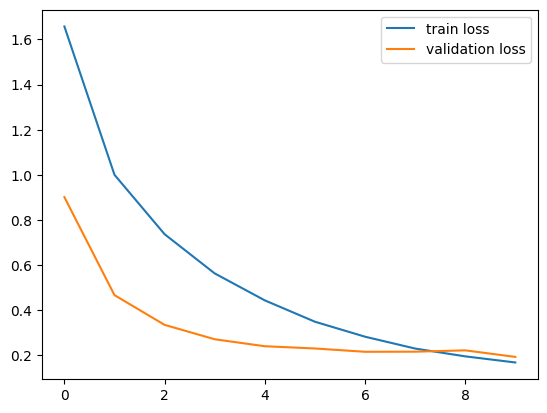

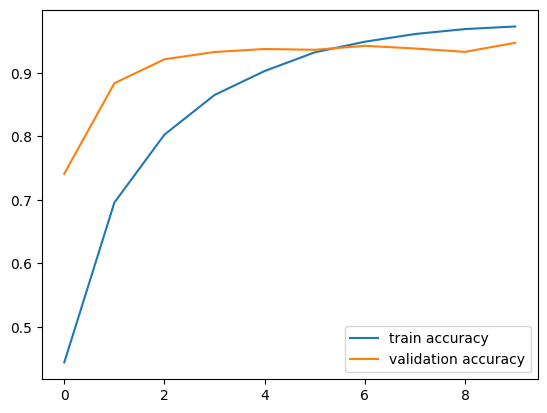

In [57]:
h = history

#plot loss function value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()